In [3]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('../data/hotel_reviews.csv')

data.head()

,id,name,hotel,review,date,sentiment,score
0,84,Excellent trainer and coach,Golden Tulip Westlands Nairobi,Moses was professional and really helped me fo...,March 2021,positive,0.394284
1,85,Gym and staff review,Golden Tulip Westlands Nairobi,The gym has excellent facilities and dedicated...,March 2021,positive,0.405347
2,86,Quality services,Golden Tulip Westlands Nairobi,This is one of the best hotels with quality se...,March 2021,positive,0.496719
3,87,Good results after my first 3 months with coac...,Golden Tulip Westlands Nairobi,Having being consistency in my training since ...,March 2021,positive,0.152437
4,88,Gym consistency,Golden Tulip Westlands Nairobi,"Well equipped, great push to exterior limits ...",March 2021,positive,0.183477


In [5]:
reviews = data['review'].values
sentiments = data['sentiment'].values

In [6]:
processed_reviews = []

for sentence in range(0, len(reviews)):
    # Remove all the special characters
    processed_review = re.sub(r'\W', ' ', str(reviews[sentence]))

    # remove all single characters
    processed_review = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_review)

    # Remove single characters from the start
    processed_review = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_review) 

    # Substituting multiple spaces with single space
    processed_review = re.sub(r'\s+', ' ', processed_review, flags=re.I)

    # Removing prefixed 'b'
    processed_review = re.sub(r'^b\s+', '', processed_review)

    # Converting to Lowercase
    processed_review = processed_review.lower()

    processed_reviews.append(processed_review)

In [7]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_reviews = vectorizer.fit_transform(processed_reviews).toarray()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_reviews, sentiments, test_size=0.2, random_state=0)

In [10]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X_train, y_train)


SVC(kernel='linear')

In [11]:
y_pred = clf.predict(X_test)

In [12]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9376740947075209


In [13]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

Precision: 0.9376740947075209
Recall: 0.9376740947075209


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.74      0.31      0.44        90
     neutral       0.50      0.01      0.02       116
    positive       0.94      1.00      0.97      2666

    accuracy                           0.94      2872
   macro avg       0.73      0.44      0.47      2872
weighted avg       0.92      0.94      0.91      2872

0.9376740947075209


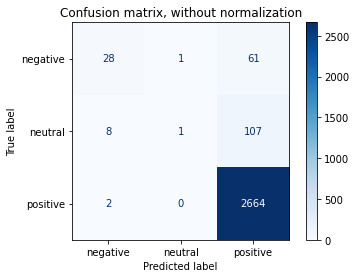

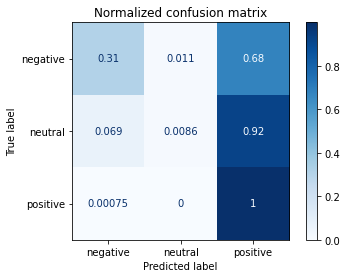

In [15]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 # display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()


In [23]:
from scipy.sparse import csr_matrix

review = "I will never be back and I don't recommend"

review_vector = vectorizer.transform([review])
sparse_matrix = csr_matrix(review_vector)
dense_matrix = sparse_matrix.todense()

print(clf.predict(dense_matrix))


['negative']
